<a href="https://colab.research.google.com/github/dayoungcho/CAU_DL4AI/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [ ]:
train_data.shape

(404, 13)

In [ ]:
test_data.shape

(102, 13)

In [ ]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)      # classification과 달리 activation function(softmax) 적용 X, 출력값 1개
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")

    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)

    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [ ]:
all_scores

[1.883969783782959, 2.535027027130127, 2.6299431324005127, 2.351130962371826]

In [ ]:
np.mean(all_scores)

2.306292951107025

**Saving the validation logs at each fold**

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")

    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)

    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()

    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)

    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

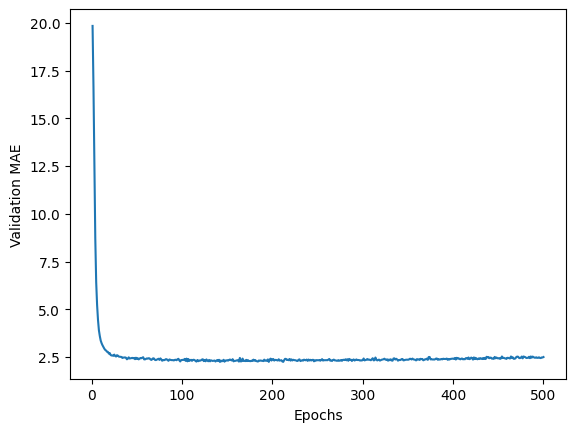

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

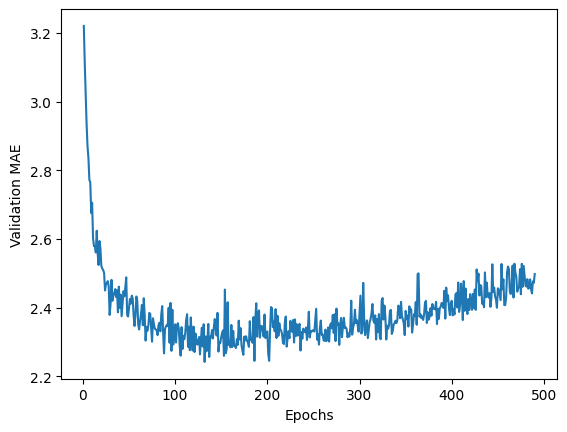

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 13.5250 - mae: 2.3609


In [ ]:
test_mae_score

2.3609158992767334

### Generating predictions on new data

In [ ]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 2ms/step


array([8.507302], dtype=float32)

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_images.shape)
print(train_images_with_noise_channels.shape)
print(train_images_with_zeros_channels.shape)

(60000, 784)
(60000, 1568)
(60000, 1568)


**Training the same model on MNIST data with noise channels or all-zero channels**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model



model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.6142 - accuracy: 0.8125 - val_loss: 0.3400 - val_accuracy: 0.8953
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2565 - accuracy: 0.9211 - val_loss: 0.1782 - val_accuracy: 0.9488
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1684 - accuracy: 0.9475 - val_loss: 0.1679 - val_accuracy: 0.9509
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1191 - accuracy: 0.9626 - val_loss: 0.1682 - val_accuracy: 0.9486
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0880 - accuracy: 0.9721 - val_loss: 0.1238 - val_accuracy: 0.9642
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0639 - accuracy: 0.9797 - val_loss: 0.1157 - val_accuracy: 0.9671
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0464 - accuracy: 0.9853 - val_loss: 0.1149 - val_accuracy: 0.9679
Epoch 

**Plotting a validation accuracy comparison**

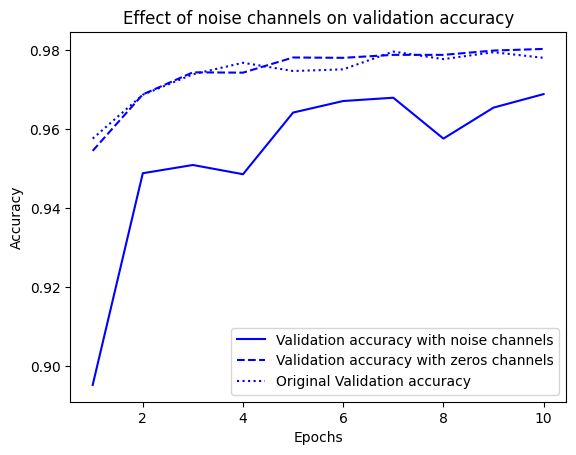

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
vla_acc = history.history['val_accuracy']

epochs = range(1, 11)

plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, vla_acc, 'b:',
         label = 'Original Validation accuracy')

plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
hisory_shuffled = model.fit(train_images, random_train_labels,
          epochs=30,
          batch_size=128,
          validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 2s 4ms/step - loss: 2.3160 - accuracy: 0.1035 - val_loss: 2.3048 - val_accuracy: 0.1034
Epoch 2/30
375/375 [==============================] - 1s 3ms/step - loss: 2.2992 - accuracy: 0.1154 - val_loss: 2.3102 - val_accuracy: 0.1032
Epoch 3/30
375/375 [==============================] - 1s 4ms/step - loss: 2.2907 - accuracy: 0.1273 - val_loss: 2.3187 - val_accuracy: 0.1018
Epoch 4/30
375/375 [==============================] - 2s 5ms/step - loss: 2.2790 - accuracy: 0.1380 - val_loss: 2.3219 - val_accuracy: 0.1058
Epoch 5/30
375/375 [==============================] - 1s 3ms/step - loss: 2.2621 - accuracy: 0.1533 - val_loss: 2.3386 - val_accuracy: 0.0970
Epoch 6/30
375/375 [==============================] - 1s 3ms/step - loss: 2.2426 - accuracy: 0.1650 - val_loss: 2.3552 - val_accuracy: 0.0964
Epoch 7/30
375/375 [==============================] - 1s 3ms/step - loss: 2.2185 - accuracy: 0.1831 - val_loss: 2.3637 - val_accuracy: 0.0990
Epoch 

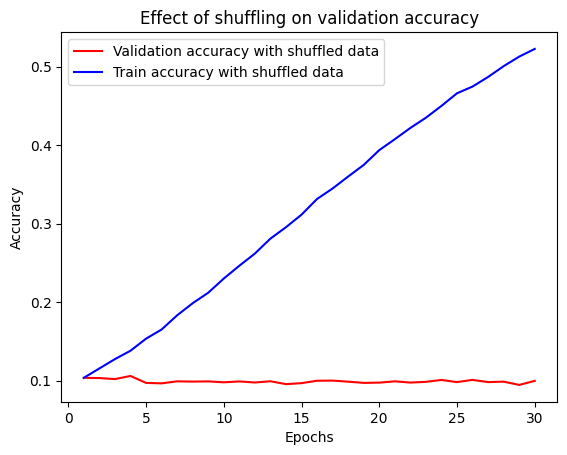

In [ ]:
import matplotlib.pyplot as plt
val_acc_shuffled = hisory_shuffled.history["val_accuracy"]
acc_shuffled = hisory_shuffled.history["accuracy"]

epochs = range(1, 31)

plt.plot(epochs, val_acc_shuffled, "r-",
         label="Validation accuracy with shuffled data")
plt.plot(epochs, acc_shuffled, "b-",
         label="Train accuracy with shuffled data")

plt.title("Effect of shuffling on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 562.1663 - accuracy: 0.2844 - val_loss: 2.2045 - val_accuracy: 0.1990
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 2.9698 - accuracy: 0.2156 - val_loss: 2.2131 - val_accuracy: 0.1975
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4900 - accuracy: 0.1853 - val_loss: 2.4843 - val_accuracy: 0.1887
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3822 - accuracy: 0.1834 - val_loss: 2.6636 - val_accuracy: 0.2368
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6268 - accuracy: 0.2145 - val_loss: 2.2319 - val_accuracy: 0.1872
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4395 - accuracy: 0.2074 - val_loss: 2.4861 - val_accuracy: 0.1747
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 2.2511 - accuracy: 0.2148 - val_loss: 5.5053 - val_accuracy: 0.1773
Epoc

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3436 - accuracy: 0.9109 - val_loss: 0.1453 - val_accuracy: 0.9591
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1253 - accuracy: 0.9641 - val_loss: 0.1271 - val_accuracy: 0.9680
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0981 - accuracy: 0.9738 - val_loss: 0.1281 - val_accuracy: 0.9712
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0801 - accuracy: 0.9793 - val_loss: 0.2236 - val_accuracy: 0.9578
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0664 - accuracy: 0.9827 - val_loss: 0.1810 - val_accuracy: 0.9693
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0608 - accuracy: 0.9851 - val_loss: 0.1739 - val_accuracy: 0.9723
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0520 - accuracy: 0.9867 - val_loss: 0.1864 - val_accuracy: 0.9723
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6620 - accuracy: 0.8408 - val_loss: 0.3583 - val_accuracy: 0.9043
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3524 - accuracy: 0.9037 - val_loss: 0.3106 - val_accuracy: 0.9147
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3180 - accuracy: 0.9120 - val_loss: 0.2921 - val_accuracy: 0.9183
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3019 - accuracy: 0.9160 - val_loss: 0.2849 - val_accuracy: 0.9213
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2922 - accuracy: 0.9184 - val_loss: 0.2798 - val_accuracy: 0.9240
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2854 - accuracy: 0.9207 - val_loss: 0.2756 - val_accuracy: 0.9236
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2810 - accuracy: 0.9215 - val_loss: 0.2717 - val_accuracy: 0.9277
Epoch 

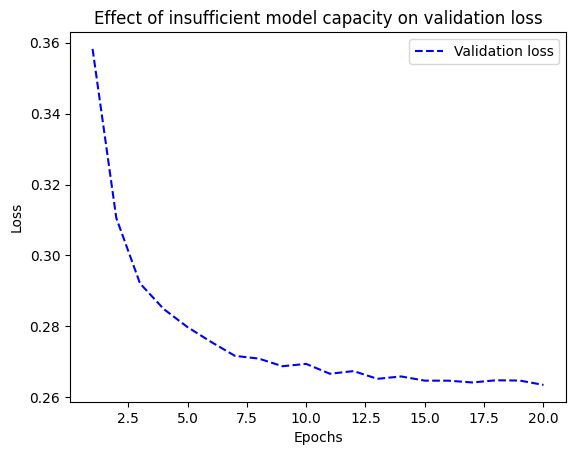

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 5ms/step - loss: 0.3757 - accuracy: 0.8926 - val_loss: 0.1984 - val_accuracy: 0.9436
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1675 - accuracy: 0.9503 - val_loss: 0.1444 - val_accuracy: 0.9586
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1160 - accuracy: 0.9652 - val_loss: 0.1085 - val_accuracy: 0.9687
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0890 - accuracy: 0.9735 - val_loss: 0.0982 - val_accuracy: 0.9713
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0712 - accuracy: 0.9789 - val_loss: 0.0891 - val_accuracy: 0.9725
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0594 - accuracy: 0.9812 - val_loss: 0.0915 - val_accuracy: 0.9719
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0498 - accuracy: 0.9849 - val_loss: 0.0926 - val_accuracy: 0.9736
Epoch 

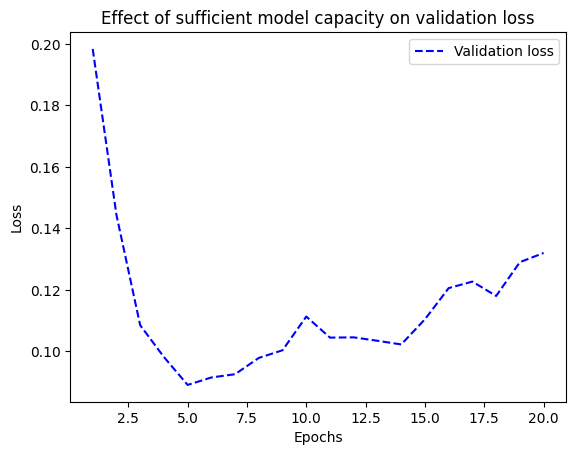

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of large model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 2s 0us/step


In [ ]:
train_data.shape

(25000,)

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

train_data = vectorize_sequences(train_data)

In [ ]:
train_data.shape

(25000, 10000)

In [ ]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 5s 70ms/step - loss: 0.5232 - accuracy: 0.7670 - val_loss: 0.3834 - val_accuracy: 0.8664
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3180 - accuracy: 0.8959 - val_loss: 0.3486 - val_accuracy: 0.8574
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2379 - accuracy: 0.9237 - val_loss: 0.2863 - val_accuracy: 0.8866
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1886 - accuracy: 0.9399 - val_loss: 0.3092 - val_accuracy: 0.8737
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1611 - accuracy: 0.9485 - val_loss: 0.2779 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1365 - accuracy: 0.9567 - val_loss: 0.3047 - val_accuracy: 0.8814
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1157 - accuracy: 0.9655 - val_loss: 0.3074 - val_accuracy: 0.8821
Epoch 8/20
30

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 67ms/step - loss: 0.5895 - accuracy: 0.7610 - val_loss: 0.5019 - val_accuracy: 0.8505
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4395 - accuracy: 0.8761 - val_loss: 0.4117 - val_accuracy: 0.8692
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3550 - accuracy: 0.8985 - val_loss: 0.3594 - val_accuracy: 0.8786
Epoch 4/20
30/30 [==============================] - 2s 54ms/step - loss: 0.2973 - accuracy: 0.9127 - val_loss: 0.3265 - val_accuracy: 0.8806
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2564 - accuracy: 0.9221 - val_loss: 0.3047 - val_accuracy: 0.8871
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2251 - accuracy: 0.9325 - val_loss: 0.2872 - val_accuracy: 0.8917
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2004 - accuracy: 0.9396 - val_loss: 0.2802 - val_accuracy: 0.8902
Epoch 8/20
30

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 70ms/step - loss: 0.5791 - accuracy: 0.7038 - val_loss: 0.3581 - val_accuracy: 0.8673
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3205 - accuracy: 0.8697 - val_loss: 0.2784 - val_accuracy: 0.8869
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2452 - accuracy: 0.9033 - val_loss: 0.2716 - val_accuracy: 0.8856
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1809 - accuracy: 0.9321 - val_loss: 0.2763 - val_accuracy: 0.8855
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1474 - accuracy: 0.9444 - val_loss: 0.2811 - val_accuracy: 0.8864
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1057 - accuracy: 0.9617 - val_loss: 0.2977 - val_accuracy: 0.8868
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0820 - accuracy: 0.9735 - val_loss: 0.3304 - val_accuracy: 0.8830
Epoch 8/20
30

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 84ms/step - loss: 0.5997 - accuracy: 0.7759 - val_loss: 0.4647 - val_accuracy: 0.8653
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4017 - accuracy: 0.8920 - val_loss: 0.4024 - val_accuracy: 0.8737
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3296 - accuracy: 0.9139 - val_loss: 0.4372 - val_accuracy: 0.8473
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2907 - accuracy: 0.9268 - val_loss: 0.3571 - val_accuracy: 0.8883
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2723 - accuracy: 0.9349 - val_loss: 0.3724 - val_accuracy: 0.8783
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2544 - accuracy: 0.9412 - val_loss: 0.3575 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2429 - accuracy: 0.9447 - val_loss: 0.3754 - val_accuracy: 0.8806
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 7s 75ms/step - loss: 0.6389 - accuracy: 0.6223 - val_loss: 0.5412 - val_accuracy: 0.8145
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.5416 - accuracy: 0.7469 - val_loss: 0.4560 - val_accuracy: 0.8546
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.4651 - accuracy: 0.8077 - val_loss: 0.4069 - val_accuracy: 0.8651
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.4055 - accuracy: 0.8465 - val_loss: 0.3386 - val_accuracy: 0.8850
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3534 - accuracy: 0.8737 - val_loss: 0.3133 - val_accuracy: 0.8800
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3174 - accuracy: 0.8885 - val_loss: 0.2899 - val_accuracy: 0.8908
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2866 - accuracy: 0.9042 - val_loss: 0.2832 - val_accuracy: 0.8911
Epoch 8/20
30

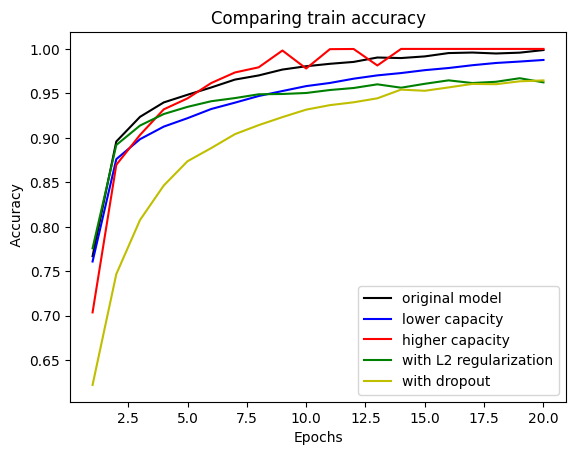

In [ ]:
# train accuracy 시각화

import matplotlib.pyplot as plt
acc = history_original.history["accuracy"]
smaller_acc = history_smaller_model.history["accuracy"]
larger_acc = history_larger_model.history["accuracy"]
l2_acc = history_l2_reg.history["accuracy"]
dropout_acc = history_dropout.history["accuracy"]


epochs = range(1, 21)

plt.plot(epochs, acc, "k",
         label="original model")
plt.plot(epochs, smaller_acc, "b",
         label="lower capacity")
plt.plot(epochs,larger_acc, "r",
         label = "higher capacity")
plt.plot(epochs, l2_acc, "g",
         label = "with L2 regularization")
plt.plot(epochs, dropout_acc, "y",
         label = "with dropout")

plt.title("Comparing train accuracy")
plt.xlabel("Epochs")
plt.ylabel(" Accuracy")
plt.legend()

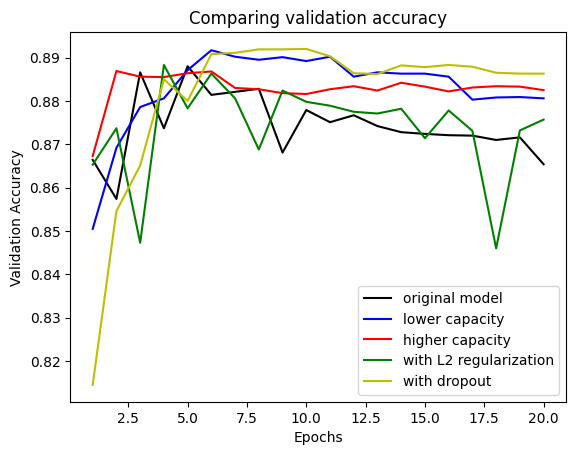

In [ ]:
# validation accuracy 시각화

import matplotlib.pyplot as plt
val_acc = history_original.history["val_accuracy"]
smaller_val_acc = history_smaller_model.history["val_accuracy"]
larger_val_acc = history_larger_model.history["val_accuracy"]
l2_val_acc = history_l2_reg.history["val_accuracy"]
dropout_val_acc = history_dropout.history["val_accuracy"]


epochs = range(1, 21)

plt.plot(epochs, val_acc, "k",
         label="original model")
plt.plot(epochs, smaller_val_acc, "b",
         label="lower capacity")
plt.plot(epochs,larger_val_acc, "r",
         label = "higher capacity")
plt.plot(epochs, l2_val_acc, "g",
         label = "with L2 regularization")
plt.plot(epochs, dropout_val_acc, "y",
         label = "with dropout")

plt.title("Comparing validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()

## Summary